**Master's Degree in Data Sciences |** EAFIT University  
**Course:** Fundamentals of Data Science  
**Group:** Sara Martinez Rendon (smartiner4@eafit.edu.co) |   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Heider Zapata (hzapata1@eafit.edu.co) |   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Yeison Londoño (ylondon4@eafit.edu.co)  
**Date:** 05/02/2026

# **TALLER 5: adquisición y limpieza de datos**

La base de datos seleccionada fue la de los sobrevivientes del titanic.


## Pasos:

Importar librerías

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

Importar base de datos de Kaggle directamente sin descargar, usando la API 'kagglehub'

In [4]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

# Esto te mostrará el nombre exacto de todos los archivos en esa carpeta
print('Documentos en la carpeta: ')
print(os.listdir(path))

Path to dataset files: C:\Users\ylondono\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1
Documentos en la carpeta: 
['Titanic-Dataset.csv']


Ya sabiendo que el 'Titanic.Dataset' se guardó como un.csv, entonces llamamos el dataset y empezamos a explorarlo

In [5]:
# Unimos la ruta con el nombre del archivo CSV
dataset_name = os.listdir(path)

ruta_dataset = os.path.join(path, dataset_name[0])

titanic_dataset = pd.read_csv(ruta_dataset) #Este es nuestro dataset original al cual le haremos copias

Una vez cargado, se busca conocer el dataset, que columnas tiene y cual es su contenido:

In [6]:
#Ver las primeras 5 filas del dataset
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Ver las últimas 5 filas del dataset
titanic_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# df.shape: Conocer el número de filas y columnas.
titanic_dataset.shape

(891, 12)

In [9]:
#Saber cuales son las columans con las que cuenta el dataset
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#Saber tipo de cada columna y si tiene datos nulos
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Entonces vemos que existen las columnas:  

**PassengerId:** ID del pasajero  
**Survived:** una columna dummy si sobrevivió o no (Sí= 1 o No = 0)  
**Pclass:** Clase del pasajero  
**Name:** Nombre de pasajero (Apellido, Titulo. Nombre de pila)  
**Sex:** sexo  
**Age:** Edad  
**SibSp:** Conteo de hermanos o esposos  
**Parch:** Conteo de padres e hijos  
**Ticket:** Número de tiquete  
**Fare:** Precio del tiquete  
**Cabin:** Número de la cabina  
**Embarked:** número de puerta de embarque  


Ahora para explorar los valores vacios en cada columna, para ver si alguna variable requiere ser "rellenada" y elegir el método de imputación que mejor se ajuste:

In [11]:
#Valores nulo por columa
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Para empezar a trabajar con el dataset realizamos una copia:

In [12]:
# make a copy of the dataframe
titanic = titanic_dataset.copy()
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Y para comprender más los nombres de las columnas, se aplica un rename a los combres de algunas columnas:

In [13]:
# Renombrar usando nombres más estándar (sin caracteres especiales)
titanic = titanic.rename(columns={
    "Pclass": "Ticket_class", 
    "SibSp": "Siblings_Spouses_Aboard", 
    "Parch": "Parents_Children_Aboard", 
    "Ticket": "Ticket_Number",
    "Fare": "Passenger_Fare", 
    "Cabin": "Cabin_Number", 
    "Embarked": "Port_Embarkation"
})
titanic.columns

Index(['PassengerId', 'Survived', 'Ticket_class', 'Name', 'Sex', 'Age',
       'Siblings_Spouses_Aboard', 'Parents_Children_Aboard', 'Ticket_Number',
       'Passenger_Fare', 'Cabin_Number', 'Port_Embarkation'],
      dtype='object')

Como primer paso vamos a identificar el método de imputación para los datos faltantes en la edad. Primero observamos la distribución de la columna edad sin los datos que están nulos:

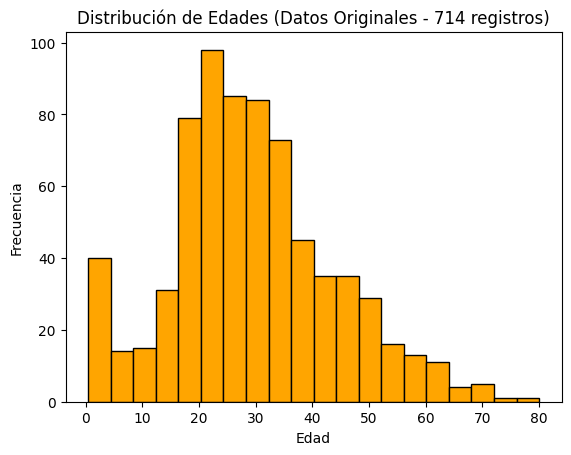

In [14]:
# Usamos .dropna() explícitamente para asegurar que solo graficamos datos existentes
titanic['Age'].dropna().hist(bins=20, grid=False, color='orange', edgecolor='black')

# Añadir títulos y etiquetas para mayor claridad
plt.title('Distribución de Edades (Datos Originales - 714 registros)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar la cantidad de nulos en el gráfico como texto (opcional)
plt.annotate(f'Nulos omitidos: 177', xy=(60, 150), color='red')
plt.show()


Selección del método de imputación en la columna 'Age':
- Imputación con la **mediana**: en este caso daría como resultado un **Efecto de pico Artificial** debido a que los datos vacíos son el 20% de la columna y serían llenados con un valor constante, lo que altera la varianza y la distribución. 
- Imputación de la mediana agrupando por sexo y clase del pasajero: no es una imputación efectiva dado que crea un pico artifical y no cuenta con las suficientes características para determinar la edad del pasajero.
- Imputación usando KNN (k-nearest neighbors), partiendo de la hipótesis que se pueden encontrar puntos similares cerca el uno del otro, las características que se toman para evaluar el KNN son: clase del pasajero, sexo, cuantas hermanas/esposos tiene, cuantos padres o niños tiene, y el valor de la tarifa del tiquete.

In [15]:

titanic = titanic_dataset.copy()

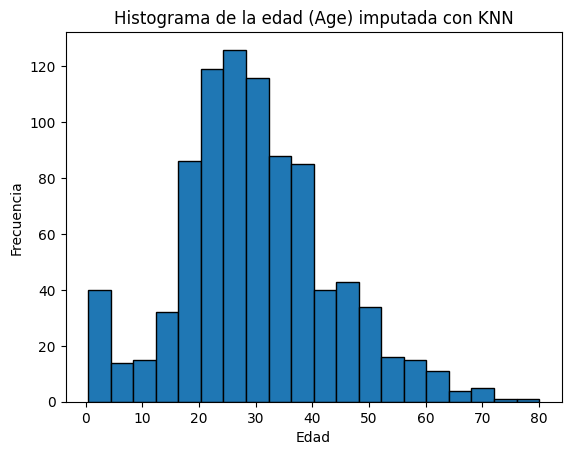

In [16]:
from sklearn.impute import KNNImputer

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]

df_knn = titanic_dataset.copy()
df_knn["Sex"] = df_knn["Sex"].map({"male": 0, "female": 1})

imputer = KNNImputer(n_neighbors=5)
df_knn["Age"] = imputer.fit_transform(df_knn[features + ["Age"]])[:, -1]

#Plot del nuevo histograma de la edad con KNN
plt.hist(df_knn["Age"], bins=20, edgecolor='black')
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de la edad (Age) imputada con KNN")

plt.show()




La edad con la imputación por KNN no cambia su distribución o varianza, pero hay una variable que habiamos dejado de lado y puede ser una buena proxy de la edad de la persona: el título que aparece en su nombre. A inicios del siglo XX, el titulo de una persona dependía de su edad y estatus. Esta variable la podemos obtener de la columna 'Name', haciendo uso del _feature engineering_ o ingeniería de características. 

De esta manera, imputaremos los missings en edad a partir de la edad mediana del grupo al que pertenece cada persona según su título y clase social:

In [17]:
titanic = titanic_dataset.copy()

In [18]:
# 1. Extraer el título (usando tu columna 'Name')

# obervamos el patro en Name para hacer el Regex: "Apellido, Título. Resto del Nombre"
print("----- Identificar patron ----")
print(titanic['Name'].value_counts())
print("-----")
#Verifiquemos que el nombre siempre sigue la misma extructura: "Apellido, Título. Resto del Nombre"
sin_patron = titanic[~titanic['Name'].str.contains(r', [A-Za-z]+\.', regex=True)]
print(f"Registros que no siguen el patrón estándar: {len(sin_patron)}")
if len(sin_patron) > 0:
    print(sin_patron['Name'].head())
print("-----")
#Solo 1 observación no sigue el patron, pero no es grave: el titulo es "the Countess" pero igual el Regex nos permite capturar "Countess", lo cual nos sirve para nuestro ejercicio)
#Procedemos a extraer el titulo

titanic['Title'] = titanic['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

----- Identificar patron ----
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64
-----
Registros que no siguen el patrón estándar: 1
759    Rothes, the Countess. of (Lucy Noel Martha Dye...
Name: Name, dtype: object
-----


In [19]:
# 2. Ver frecuencias totales de títulos, edad promedio según titulo y missings según titulo
print("--- Frecuencia de Títulos ---")
print(titanic['Title'].value_counts())
print("-----")
# 3. Ver relación Título-Edad (Mediana y conteo de NAs)
# Esto te confirmará si hay títulos con muchos missings
reporte_titulos = titanic.groupby('Title')['Age'].agg(
    mediana='median',
    count='count',
    missings=lambda x: x.isnull().sum()
).sort_values(by='count', ascending=False)

print("\n--- Reporte de Edad por Título ---")
print(reporte_titulos)

--- Frecuencia de Títulos ---
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64
-----

--- Reporte de Edad por Título ---
          mediana  count  missings
Title                             
Mr           30.0    398       119
Miss         21.0    146        36
Mrs          35.0    108        17
Master        3.5     36         4
Rev          46.5      6         0
Dr           46.5      6         1
Mlle         24.0      2         0
Major        48.5      2         0
Col          58.0      2         0
Capt         70.0      1         0
Lady         48.0      1         0
Countess     33.0      1         0
Don          40.0      1         0
Jonkheer     38.0      1         0
Mme          24.0      1         0
Ms           28.0      1     

Dado que los titulos atípicos no tienen valores vacíos en edad, salvo por Dr, y que no son muchos, decidimos no realizar agrupaciones más generales por titulo. No obstante, el análisis anterior nos permite confirmar que la edad mediana sí varía según el titulo, lo cual luego nos servirá para no asignar una edad mayor a los niños (Master) y las mujeres solteras (Miss). Mientras que a los hombres y mujeres casadas, que representan la mayoría de los missings en edad, se les puede asignar la edad mediana de su grupo por titulo y clase.

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [21]:
# Renombrar usando nombres más estándar (sin caracteres especiales)
titanic = titanic.rename(columns={
    "Pclass": "Ticket_class", 
    "SibSp": "Siblings_Spouses_Aboard", 
    "Parch": "Parents_Children_Aboard", 
    "Ticket": "Ticket_Number",
    "Fare": "Passenger_Fare", 
    "Cabin": "Cabin_Number", 
    "Embarked": "Port_Embarkation"
})
titanic.columns

Index(['PassengerId', 'Survived', 'Ticket_class', 'Name', 'Sex', 'Age',
       'Siblings_Spouses_Aboard', 'Parents_Children_Aboard', 'Ticket_Number',
       'Passenger_Fare', 'Cabin_Number', 'Port_Embarkation', 'Title'],
      dtype='object')

In [22]:
# Antes de hacer el replace veamos las edades medianas según las combinaciones de titulo y clase
# Crear la tabla de referencia agrupada por Título y Clase
tabla_referencia = titanic.groupby(['Title', 'Ticket_class'])['Age'].agg(
    mediana='median',
    promedio='mean',
    registros_reales='count',
    faltantes=lambda x: x.isnull().sum()
).reset_index()

# Ordenar para ver los grupos con más datos faltantes primero
print("--- Tabla de Referencia: Edad por Título y Clase ---")
print(tabla_referencia.sort_values(by='faltantes', ascending=False))

--- Tabla de Referencia: Edad por Título y Clase ---
       Title  Ticket_class  mediana   promedio  registros_reales  faltantes
19        Mr             3     26.0  28.724891               229         90
14      Miss             3     18.0  16.123188                69         33
17        Mr             1     40.0  41.580460                87         20
18        Mr             2     31.0  32.768293                82          9
22       Mrs             3     31.0  33.515152                33          9
20       Mrs             1     41.5  40.882353                34          8
11    Master             3      4.0   5.350833                24          4
13      Miss             2     24.0  22.390625                32          2
4         Dr             1     46.5  43.750000                 4          1
12      Miss             1     30.0  30.000000                45          1
9     Master             1      4.0   5.306667                 3          0
8      Major             1     48.5

La estadística descriptiva nos muestra que la edad mediana también varía según el titulo y la clase, por lo cual procedemos a reemplazar las edades vacías por la mediana según titulo y clase:

In [23]:
# 4. Imputar edad según titulo y clase:
# 'transform' calcula la mediana para cada grupo y la distribuye en las filas correspondientes
titanic['Age'] = titanic['Age'].fillna(
    titanic.groupby(['Title', 'Ticket_class'])['Age'].transform('median')
)

print(f"Total de valores nulos en Age tras la limpieza: {titanic['Age'].isnull().sum()}")

# 4. Breve resumen estadístico post-imputación
print("\nResumen de la variable Age después de la limpieza:")
print(titanic['Age'].describe())


Total de valores nulos en Age tras la limpieza: 0

Resumen de la variable Age después de la limpieza:
count    891.000000
mean      29.146655
std       13.499426
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64


Una vez hecha la imputación a la columna 'Age', procedemos a realizar imputación a la columna de puertas de embarque:

In [24]:
titanic.isna().sum()

PassengerId                  0
Survived                     0
Ticket_class                 0
Name                         0
Sex                          0
Age                          0
Siblings_Spouses_Aboard      0
Parents_Children_Aboard      0
Ticket_Number                0
Passenger_Fare               0
Cabin_Number               687
Port_Embarkation             2
Title                        0
dtype: int64

Para llenar los valores nulos que 'Port_Embarkation' se usara la moda, debido a que solo son 2 valores de 891, y es un dato 'str'

In [25]:
#Llenar los valores nulos de la puerta de embarque
# Reemplazo NaN con la moda agrupada por clase de ticket (mejor para datos categóricos)
titanic["Port_Embarkation"] = titanic.groupby(["Ticket_class"])["Port_Embarkation"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'S')
)

#Verificamos que ya no estén vacías las puertas de embarque
print("\nValores nulos en Port_Embarkation después de la limpieza:")
print(titanic["Port_Embarkation"].isna().sum())


Valores nulos en Port_Embarkation después de la limpieza:
0


Ahora es momento de encargarse de los valores nulos de la columna 'Cabin_Number', como el 77.1% esta vacío y además es un string, y no se le ve importancia al dato, optamos por eliminar la columna:

In [26]:
titanic = titanic.drop(columns=['Cabin_Number'], errors='ignore')

titanic.isna().sum()

titanic_clean = titanic


Ahora trabajamos con el df: titanic_clean que ya no tiene valores nulos para hacerle un EDA, lo que primero vamos a hacer es identificar inconsistencias en el df, como que los id de los pasajeros deberían ser únicos, y ver si los números de los tiquetes también son únicos:

In [27]:
titanic_clean = titanic

print('El número de duplicados en PassengerId:', titanic_clean[['PassengerId']].duplicated().sum())
print('El número de duplicados en Ticket_Number:', titanic_clean[['Ticket_Number']].duplicated().sum())

El número de duplicados en PassengerId: 0
El número de duplicados en Ticket_Number: 210


Se puede asumir que los que tienen el mismo número de tiquete son familia? pertenecen a la misma clase social? o son amigos? porque tienen el mismo tiquete?

In [28]:
duplicados_numticket = titanic['Ticket_Number'].value_counts()[titanic['Ticket_Number'].value_counts() > 1]
print(duplicados_numticket)

Ticket_Number
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
392096             2
S.O./P.P. 3        2
W./C. 6607         2
S.C./PARIS 2079    2
A/4 48871          2
Name: count, Length: 134, dtype: int64


Se sabe que hay 210 duplicados que corresponden a 134 Ticket_Number, por lo que se quiere saber si se duplican esos valores porque son familiares/amigos o si definitivamente no tiene relación

In [29]:
print('Duplicados en el grupo de features: Ticket_Number, Siblings_Spouses_Aboard, Parents_Children_Aboard', 'Ticket_class')
print(titanic.duplicated(subset=['Ticket_Number', 'Siblings_Spouses_Aboard', 'Parents_Children_Aboard', 'Ticket_class']).sum())
print('')

frecuencias = (
    titanic[['Ticket_Number', 'Siblings_Spouses_Aboard', 'Parents_Children_Aboard', 'Ticket_class']]
    .value_counts()
    .reset_index(name='Frecuencia')
    .sort_values(['Ticket_Number', 'Frecuencia'], ascending=[True, True])
    .reset_index(drop=True)
)
 
print(frecuencias.head(5))

print('')
print('La cantidad de grupos que se repiten son:')
print(frecuencias[frecuencias['Frecuencia'] > 1].shape[0])

Duplicados en el grupo de features: Ticket_Number, Siblings_Spouses_Aboard, Parents_Children_Aboard Ticket_class
154

  Ticket_Number  Siblings_Spouses_Aboard  Parents_Children_Aboard  \
0        110152                        0                        0   
1        110413                        0                        2   
2        110413                        1                        1   
3        110465                        0                        0   
4        110564                        0                        0   

   Ticket_class  Frecuencia  
0             1           3  
1             1           1  
2             1           2  
3             1           2  
4             1           1  

La cantidad de grupos que se repiten son:
113


In [30]:
# Ejemplo con el ticket 110413 que esta repetido
print(titanic_clean[titanic_clean['Ticket_Number'] == '110413'][['Name', 'Age', 'Siblings_Spouses_Aboard', 'Parents_Children_Aboard', 'Ticket_class']])


                                       Name   Age  Siblings_Spouses_Aboard  \
262                       Taussig, Mr. Emil  52.0                        1   
558  Taussig, Mrs. Emil (Tillie Mandelbaum)  39.0                        1   
585                     Taussig, Miss. Ruth  18.0                        0   

     Parents_Children_Aboard  Ticket_class  
262                        1             1  
558                        1             1  
585                        2             1  


In [31]:
# Tomando otro ejemplo con el ticket 110413 que esta repetido
print(titanic_clean[titanic_clean['Ticket_Number'] == '110152'][['Name', 'Age', 'Siblings_Spouses_Aboard', 'Parents_Children_Aboard', 'Ticket_class']])

                                                  Name   Age  \
257                               Cherry, Miss. Gladys  30.0   
504                              Maioni, Miss. Roberta  16.0   
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  33.0   

     Siblings_Spouses_Aboard  Parents_Children_Aboard  Ticket_class  
257                        0                        0             1  
504                        0                        0             1  
759                        0                        0             1  


Observando los dos ejemplos anteriores, las personas que compartían tiquete eran familiares o tenían vinculos laborales, debido a que en ese momento las personas viajaban con sus sirvientes.

Ahora vamos a hacer el ejercicio para saber en qué ciclo de vida se encontraba la mayor cantidad de sobrevivientes:

### Transformación ONE HOT Encoding para la variable edad

In [32]:
# 1. Vamos a crear una variable categorica que agrupe la edad según rangos de edad (ciclo vital)

# Definir los puntos de corte y las etiquetas
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Senior']

# Crear la nueva columna
titanic_clean['Age_Group'] = pd.cut(titanic_clean['Age'], bins=bins, labels=labels)
print(titanic_clean['Age_Group'].unique())
print(f"--------------------------------")


['Adult', 'Child', 'Teenager', 'Senior']
Categories (4, object): ['Child' < 'Teenager' < 'Adult' < 'Senior']
--------------------------------


In [33]:
# 2. # Creamos el set de columnas dummy
# prefix='Age' hará que las columnas se llamen Age_Child, Age_Teenager, etc. y les asigna true o flase dependiendo su edad
age_dummies = pd.get_dummies(titanic_clean['Age_Group'], prefix='Age')
print(age_dummies)
print(f"--------------------------------")

     Age_Child  Age_Teenager  Age_Adult  Age_Senior
0        False         False       True       False
1        False         False       True       False
2        False         False       True       False
3        False         False       True       False
4        False         False       True       False
..         ...           ...        ...         ...
886      False         False       True       False
887      False         False       True       False
888      False          True      False       False
889      False         False       True       False
890      False         False       True       False

[891 rows x 4 columns]
--------------------------------


In [34]:
# Concatenar el Dataframe original con las nuevas columnas "dummy" y eliminamos la columna original
titanic_encoded = pd.concat([titanic_clean.drop('Age_Group', axis=1), age_dummies], axis=1)
print(titanic_encoded.columns)
print(f"----------  TITANIC ENCODED  -----------------")
print(titanic_encoded.head(5))

Index(['PassengerId', 'Survived', 'Ticket_class', 'Name', 'Sex', 'Age',
       'Siblings_Spouses_Aboard', 'Parents_Children_Aboard', 'Ticket_Number',
       'Passenger_Fare', 'Port_Embarkation', 'Title', 'Age_Child',
       'Age_Teenager', 'Age_Adult', 'Age_Senior'],
      dtype='object')
----------  TITANIC ENCODED  -----------------
   PassengerId  Survived  Ticket_class  \
0            1         0             3   
1            2         1             1   
2            3         1             3   
3            4         1             1   
4            5         0             3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male

Ahora vemos cuales fueron los sobrevivientes por ciclo de edad

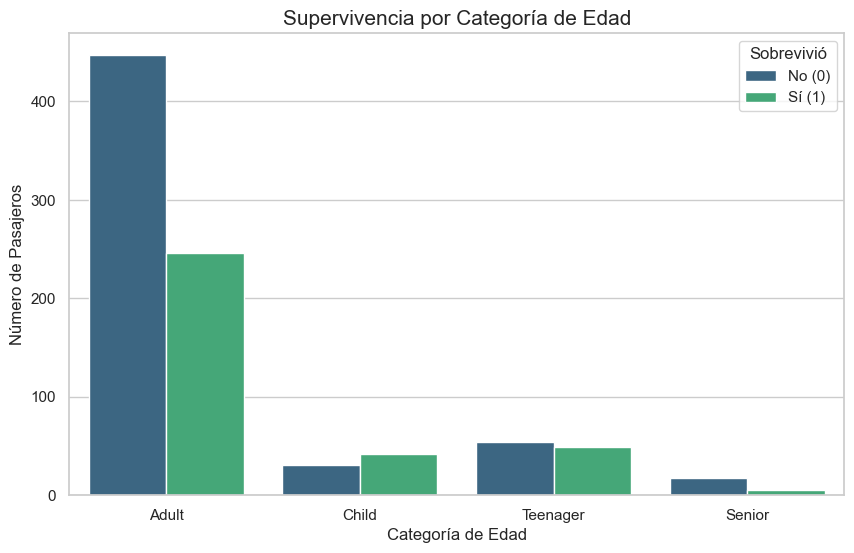

In [35]:
import seaborn as sns #Librería que trabaja en conjunto con plt para hacer mejores gráficos

def definir_categoria(row):
    if row['Age_Child']: return 'Child'
    if row['Age_Teenager']: return 'Teenager'
    if row['Age_Adult']: return 'Adult'
    if row['Age_Senior']: return 'Senior'
    return 'Unknown'

titanic_encoded['Age_Category'] = titanic_encoded.apply(definir_categoria, axis=1)


sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))


ax = sns.countplot(data=titanic_encoded, x='Age_Category', hue='Survived', palette='viridis')


plt.title('Supervivencia por Categoría de Edad', fontsize=15)
plt.xlabel('Categoría de Edad', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)
plt.legend(title='Sobrevivió', labels=['No (0)', 'Sí (1)'])


plt.show()

El gráfico anterior indica que fueron más los niños que sobrevivieron que los que no, mientras que en los demás ciclos etarios fue mayor la cantidad de personas que no sobrevivió.